In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
import pickle as pkl
import pandas as pd
import numpy as np
import cv2
import os
import re

<h1>Load Dataset and feature Matrix</h1>

In [15]:
images = pd.read_csv('../Datasets/Assignment 3/Ages.csv')

In [16]:
file_name = '../Datasets/Assignment 3/Compressed_images/Compressed_data_age_1'
with open(file_name, 'rb') as handle:
    feature_matrix = pkl.load(handle)
print(feature_matrix.shape)

(23708, 3072)


In [17]:
X_train,X_test,y_train,y_test = train_test_split(feature_matrix,images['Age'],test_size=0.2)

In [18]:
X_train.shape,X_test.shape

((18966, 3072), (4742, 3072))

In [19]:
reg = LinearRegression()

In [21]:
params = {'alpha':[0.0001,0.001,0.003,0.01,0.03,0.1],'penalty':['l2','l1','elasticnet'],'l1_ratio':[0,0.1,0.15,0.18]}

In [8]:
reg.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred = reg.predict(X_test)

In [10]:
mse = MSE(y_test,y_pred)
rmse = np.sqrt(mse) 

In [26]:
# model_file = 'Linear_Reg_Images_UTKFace.sav'
model_file = 'Linear_Reg_Images_my_data.sav'
pkl.dump(reg,open(model_file,'wb'))

In [27]:
# model_file = 'Linear_Reg_Images_UTKFace.sav'
model_file = 'Linear_Reg_Images_my_data.sav'
reg = pkl.load(open(model_file,'rb'))

<h1 style='text-align:center'>Model evaluation</h1>

In [11]:
print(f'Parameters: {reg.get_params()}')
print(f'Coefficient: {reg.coef_}')
print(f'Intercept: {reg.intercept_}')
print(f'Mean squared error {mse}')
print(f'Root mean squared error: {rmse}')

Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}
Coefficient: [  8.00206802 -16.36094617  10.49282066 ...   2.06788536  -4.48354658
  -0.82071432]
Intercept: 34.33237527301383
Mean squared error 187.09651122612084
Root mean squared error: 13.67832267590295


In [28]:
X_test_array_index = np.arange(1,X_test.shape[0]+1)
X_train_array_index = np.arange(1,X_train.shape[0]+1)
X_test_array_index.shape,y_test.shape

((13,), (13,))

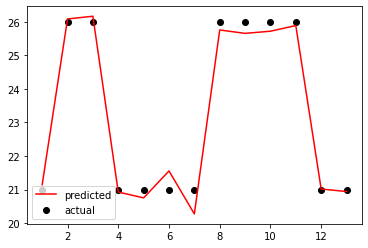

In [29]:
plt.scatter(X_test_array_index,y_test,color='black',label='actual')
plt.plot(X_test_array_index,y_pred,color='red',label='predicted')
plt.legend()
plt.plot()
plt.show()